# Dealing with missing data

## Identifying missing values in tabular data

In [1]:
import pandas as pd
from io import StringIO

csv_data = \
     '''A,B,C,D
     1.0,2.0,3.0,4.0
     5.0,6.0,,8.0
     10.0,11.0,12.0,'''
 
# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)
 
df = pd.read_csv(StringIO(csv_data))
print(df)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


In [2]:
## NaN per columns

df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
## panda dataFrame to numpy array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

## Eliminating training examples or features with missing values

In [4]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
## drop rows , all NaN

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
## drop row , fewer than 4 values
df.dropna(thresh=4)


,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
## drop rows, if NaN is in column 'C'

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputing missing values

In [9]:
## mean imputation , SimpleImputer class

from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

print(imputed_data)

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


In [10]:
df.mean()

A    5.333333
B    6.333333
C    7.500000
D    6.000000
dtype: float64

In [11]:
## mean imputing , df.fillna

df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


# Handling categorical data

## Categorical data encoding with pandas

In [12]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class2'],
            ['red', 'L', 13.5, 'class1'],
            ['blue', 'XL', 15.3, 'class2']])

df            

,0,1,2,3
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [13]:
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## Mapping ordinal features

In [14]:
## categorical string into integer

size_mapping = { 'XL':3,
                 'L' :2,
                 'M' :1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [15]:
inv_size_mapping = { v:k  for k,v in size_mapping.items() }

df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels

In [16]:
import numpy as np

class_mapping = { label : idx for idx , label in enumerate(np.unique(df['classlabel'])) }

class_mapping

{'class1': 0, 'class2': 1}

In [17]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [18]:
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [19]:
## inverse mapping

inv_class_mapping = { v : k for k , v in class_mapping.items() }
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [20]:
## LabelEncoder

from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'])
y

array([1, 0, 1])

In [21]:
## Inverse transform

class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

## One-hot encoding on nominal features

In [22]:
X = df[['color','size','price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [23]:
## 'color' , LabelEncoder
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [24]:
color_le.classes_

array(['blue', 'green', 'red'], dtype=object)

In [25]:
## one-hot encoding to single column vector

from sklearn.preprocessing import OneHotEncoder


X = df[['color','size','price']].values
print("X.shape",X.shape)
print("X[:,0].shape",X[:,0].shape)
print("X[:,0].reshape(-1,1).shape",X[:,0].reshape(-1,1).shape)

color_ohe = OneHotEncoder()
print(type(color_ohe.fit_transform(X[:,0].reshape(-1,1)))) ## <class 'scipy.sparse.csr.csr_matrix'>

color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()

X.shape (3, 3)
X[:,0].shape (3,)
X[:,0].reshape(-1,1).shape (3, 1)
<class 'scipy.sparse.csr.csr_matrix'>


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [26]:
## one-hot encoding using 'Column transformer'

from sklearn.compose import ColumnTransformer

X = df[['color','size','price']].values
c_trans = ColumnTransformer([
    ('onehot',OneHotEncoder(),[0]),
    ('nothing','passthrough',[1,2])
])

print(type(c_trans.fit_transform(X)))

c_trans.fit_transform(X).astype(float)

<class 'numpy.ndarray'>


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [27]:
## one-hot encoding using pandas 'get_dummies()'
## effect on string columns

pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [28]:
## solution for multicollinearity

pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [29]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [30]:
## automatically drop 'redundant' column via 'one hot encoding'
## categories = 'True'

# color_ohe2 = OneHotEncoder(categories='auto')
color_ohe2 = OneHotEncoder(categories='auto',drop='first')
# color_ohe2 = OneHotEncoder(drop='first') ## same result

c_transf = ColumnTransformer([
    ('onehot', color_ohe2, [0]),
    ('nothing', 'passthrough', [1,2])
])

c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [31]:
## encoding ordinal feature
## threshold encoding with 0/1

df2 = pd.DataFrame([
            ['green', 'M', 10.1, 'class2'],
            ['red', 'L', 13.5, 'class1'],
            ['blue', 'XL', 15.3, 'class2']])

df2.columns = ['color','size','price','classlabel']

df2

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [32]:
## value threshold approach
df2['x > M'] = df2['size'].apply(lambda x: 1 if x in {'L','XL'} else 0)
df2['x > L'] = df2['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df2['size']

df2

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


# Partitioning a dataset into separate training and test datasets

In [33]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header=None)

df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [34]:
df_wine.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']

print('Class labels', np.unique(df_wine['Class label']))                

Class labels [1 2 3]


In [35]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
## train_test_split

from sklearn.model_selection import train_test_split

X , y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Bringing features onto the same scale

In [37]:
## min-max scaling in scikit-learn

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [38]:
print(X_train_norm.max(axis=0))
print(X_train_norm.min(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
## standardization example

ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized : ', (ex-ex.mean()/ex.std()))
print('normalized : ', (ex - ex.min())/(ex.max() - ex.min()))

standardized :  [-1.46385011 -0.46385011  0.53614989  1.53614989  2.53614989  3.53614989]
normalized :  [0.  0.2 0.4 0.6 0.8 1. ]


In [40]:
## standardization in scikit-learn
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

print(X_train_std.mean(axis=0)) ## near '0'
print(X_train_std.std(axis=0)) ## near '1'

[ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16
 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15
  1.88827448e-15 -1.61519543e-15 -5.78390382e-16  8.63108868e-16
 -1.33405831e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Selecting meaningful features

## L1 and L2 regularization as penalties against model complexity
## A geometric interpretation of L2 regularization
## Sparse solutions with L1 regularization

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',  ## 'lbfgs' doesn't support L1
                        multi_class='ovr')

lr.fit(X_train_std, y_train)                        
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy : ', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy :  1.0


In [42]:
lr.intercept_

array([-1.26343228, -1.21619125, -2.37021356])

In [43]:
print(lr.coef_.shape)
print("\n"*5)
print(lr.coef_)

(3, 13)






[[ 1.24531272  0.18126634  0.74275379 -1.16023306  0.          0.
   1.17504063  0.          0.          0.          0.          0.54146799
   2.51145753]
 [-1.53698155 -0.38763072 -0.9950445   0.36480535 -0.05953994  0.
   0.66821644  0.          0.         -1.9344845   1.23335643  0.
  -2.23197773]
 [ 0.13564213  0.16833809  0.35721254  0.          0.          0.
  -2.43808695  0.          0.          1.56389203 -0.81900987 -0.49214156
   0.        ]]


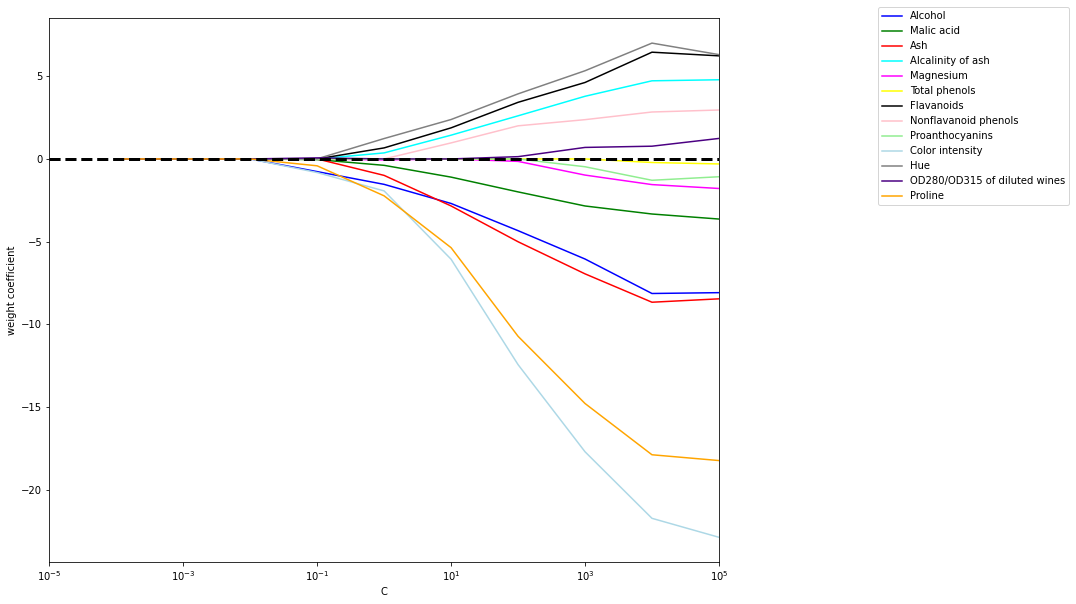

In [44]:
## plot C vs weightf of class 1 , see lr.coef_[1]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111)

colors = ['blue','green','red','cyan',
          'magenta','yellow','black',
          'pink','lightgreen','lightblue',
          'gray','indigo','orange']

weights, params = [] , []          
for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(penalty='l1', C=10.**c,
                            solver='liblinear',
                            multi_class='ovr', random_state=0)

    lr.fit(X_train_std, y_train)                            
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)    

for column, color in zip(range(weights.shape[1]),colors):
    plt.plot(params, weights[:,column],
             label = df_wine.columns[column + 1],
             color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
            bbox_to_anchor=(1.38, 1.03),
            ncol=1, fancybox=True)
plt.show()              


## Sequential feature selection algorithms

In [45]:
## SBS(Sequential Backward Selection)
## not in scikit-learn , implemnt form scratch

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):

        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                            random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        
        self.k_score = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict((X_test[:, indices]))
        score = self.scoring(y_test, y_pred)
        return score

In [56]:
## SBS , KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
# knn = KNeighborsClassifier(n_neighbors=3)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

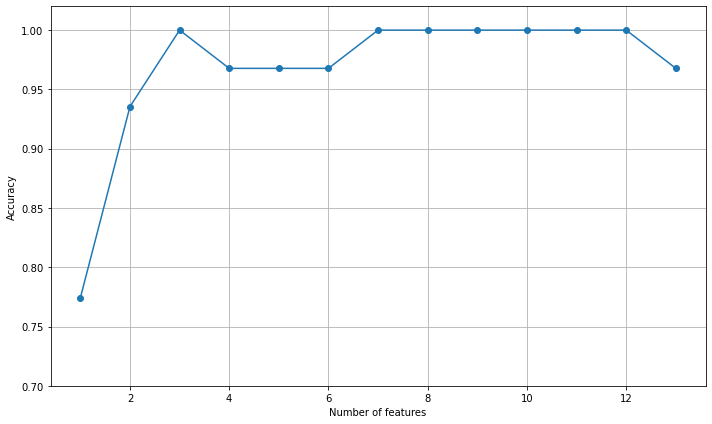

In [57]:
k_feat = [ len(k) for k in sbs.subsets_ ]

fig = plt.figure(figsize=(10,6))
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([ 0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [59]:
## see number of feature = 3 case

k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [60]:
## full feature training

knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy : ', knn.score(X_test_std, y_test))


Training accuracy: 0.967741935483871
Test accuracy :  0.9629629629629629


In [61]:
## 3 feature training
knn.fit(X_train_std[:,k3], y_train)
print('Training accuracy :', knn.score(X_train_std[:,k3], y_train) )
print('Test accuracy : ', knn.score(X_test_std[:,k3], y_test) )

Training accuracy : 0.9516129032258065
Test accuracy :  0.9259259259259259


# Assessing feature importance with random forests

 1) Proline                        0.185453 
 2) Flavanoids                     0.174751 
 3) Color intensity                0.143920 
 4) OD280/OD315 of diluted wines   0.136162 
 5) Alcohol                        0.118529 
 6) Hue                            0.058739 
 7) Total phenols                  0.050872 
 8) Magnesium                      0.031357 
 9) Malic acid                     0.025648 
10) Proanthocyanins                0.025570 
11) Alcalinity of ash              0.022366 
12) Nonflavanoid phenols           0.013354 
13) Ash                            0.013279 


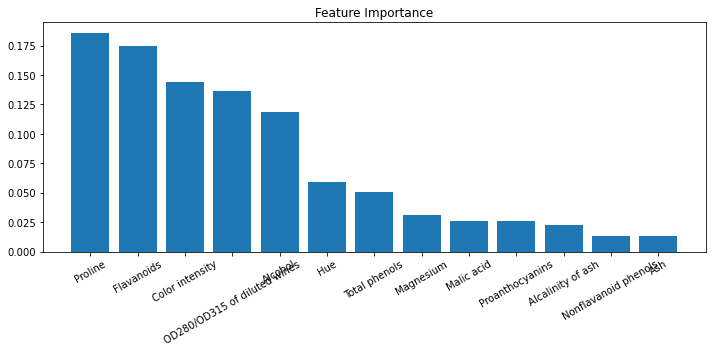

In [67]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f " % ( f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

fig = plt.figure(figsize=(10,5))
plt.title('Feature Importance')    
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=30)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()